# Assessement: Data Science for Drug Discovery

#### Imports

In [1]:
# delete unused modules at the end
from __future__ import division

# CORE
import pandas as pd
import sys
from io import StringIO

# MATPLOTLIB
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib
%matplotlib inline

# NUMPY
import numpy as np
from numpy import linalg as LA
from numpy.linalg import eigvalsh,eigh

# RDKIT
from rdkit import Chem # rdkit contains a number of molecular descriptors
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole # needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions # modifying defaults
from rdkit.Chem.Draw import IPythonConsole # needed to show molecules
DrawingOptions.bondLineWidth=1.8
from rdkit.Chem.rdmolops import GetAdjacencyMatrix
from rdkit.Chem.Crippen import MolLogP,MolMR

# SCIKIT LEARN
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel
## -------------------------------------------------
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# MISCELLANEOUS
#import ES_ML_SOSSO.chemfun as cf
import seaborn as sns

Using matplotlib backend: <object object at 0x0000023501DC32E0>


#### Data

In [2]:
# Import the data using pandas
data = pd.read_table("./moonshot_project/covid_submissions_all_info.csv"
                     , delimiter=',') # import dataset
data.shape # print shape

C:\Users\ronal\AppData\Local\Temp\ipykernel_31308\966594442.py:2: DtypeWarning: Columns (3,6,7,9,10,11,12,13,14,15,18,19,27,28,29,30,31,32,33,34,35,36,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,66,67,69,70,71,72,73,74,75,76,84,85,86,87,89,90,91,92,93,94,95,96,104,105,106,107,109,110,111,112,113,114,115,116,124,125,126,127,129,130,131,132,133,134,135,136,144,145,146,147,149,150,151,152,153,154,155,156,164,165,166,167,169,170,171,172,173,174,175,176,184,185,186,187,189,190,191,192,193,194,195,196,204,205,206,207,209,210,211,212,213,214,215,216,224,225,226,227,229,230,231,232,233,234,235,236,244,245,246,247,249,253,254,255,256,257,258,259,275,276) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table("./moonshot_project/covid_submissions_all_info.csv"


(20997, 277)

In [3]:
# Don't limit the coolumns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
data.head(2) # quick sanity check

,SMILES,CID,CID (canonical),CID (old format),Postera Link,InChIKey,creator,rationale,Submission Notes,fragments,Structure ID,Fragalysis Link,Enamine - REAL Space,Enamine - Extended REAL Space,Enamine - SCR,Enamine - BB,Mcule,Mcule Ultimate,In Molport or Mcule,In eMolecules,MW,cLogP,TPSA,Rotatable Bonds,Fraction sp3,HBA,HBD,Covalent Fragment,covalent_warhead,Acrylamide,Acrylamide Adduct,Chloroacetamide,Chloroacetamide Adduct,Vinylsulfonamide,Vinylsulfonamide Adduct,Nitrile,Nitrile Adduct,series,Order Date,Maker,Shipment Date,inspired_by,CDD_name,CDD_mol_ID,r_curve_IC50_x,r_max_inhibition_reading_x,r_min_inhibition_reading_x,r_hill_slope_x,r_R2_x,r_concentration_uM_x,...,rationale.1.1.1.1.1.1.1.1.1,fragments.1.1.1.1.1.1.1.1.1,covalent_warhead.1.1.1.1.1.1.1.1.1,r_curve_IC50_y.1.1.1.1,r_max_inhibition_reading_y.1.1.1.1,r_min_inhibition_reading_y.1.1.1.1,r_hill_slope_y.1.1.1.1,r_R2_y.1.1.1.1,r_concentration_uM_y.1.1.1.1,r_inhibition_list_y.1.1.1.1,f_curve_IC50_y.1.1.1.1,f_max_inhibition_reading_y.1.1.1.1,f_min_inhibition_reading_y.1.1.1.1,f_hill_slope_y.1.1.1.1,f_R2_y.1.1.1.1,f_concentration_uM_y.1.1.1.1,f_inhibition_list_y.1.1.1.1,structure_ID_y.1.1.1.1,structure_LINK_y.1.1.1.1,creator.2,rationale.2,fragments.2,covalent_warhead.2,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,r_curve_IC50,r_max_inhibition_reading,r_min_inhibition_reading,r_hill_slope,r_R2,r_concentration_uM,r_inhibition_list,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,f_curve_IC50,f_max_inhibition_reading,f_min_inhibition_reading,f_hill_slope,f_R2,f_concentration_uM,f_inhibition_list,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,structure_ID,structure_LINK
0,N#Cc1ccccc1NC(=O)Cc1c[nH]c2ncccc12,ANT-DIA-3c79be55-1,ANT-DIA-3c79be55-1,ANT-DIA-3c7-1,https://covid.postera.ai/covid/submissions/3c7...,JNRKVADDLOBVCB-UHFFFAOYSA-N,"Anthony Aimon, Diamond Light Source Ltd",Nitrile of X0305 seems to be key and superimpo...,Nitrile and isosters should be tested,"x0072,x0305,x0387,x0434,x0678,x0830,x1249",NaN,NaN,False,False,False,False,MCULE-2614803204,False,False,True,276.299,2.61578,81.57,3.0,0.06,3.0,2.0,True,True,False,False,False,False,False,False,True,False,3-aminopyridine-like,NaN,NaN,NaN,"AAR-POS-d2a4d1df-1,AAR-POS-d2a4d1df-5,AAR-POS-...",CVD-0000147,75708289.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N#Cc1ccccc1NC(=O)Cc1cccnc1,ANT-DIA-3c79be55-2,ANT-DIA-3c79be55-2,ANT-DIA-3c7-2,https://covid.postera.ai/covid/submissions/3c7...,LVRULDIVMIRLIV-UHFFFAOYSA-N,"Anthony Aimon, Diamond Light Source Ltd",Nitrile of X0305 seems to be key and superimpo...,Nitrile and isosters should be tested,"x0072,x0305,x0387,x0434,x0678,x0830,x1249",NaN,NaN,Z1172500933,s_11____51736____7459854,False,False,False,LVRULDIVMIRLIV-UHFFFAOYSA-N,False,False,237.262,2.13448,65.78,3.0,0.07,3.0,1.0,True,True,False,False,False,False,False,False,True,False,3-aminopyridine-like,NaN,NaN,NaN,"AAR-POS-d2a4d1df-1,AAR-POS-d2a4d1df-5,AAR-POS-...",CVD-0000148,75708290.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Describe the data
#data.describe()
data.describe(include='all')

,SMILES,CID,CID (canonical),CID (old format),Postera Link,InChIKey,creator,rationale,Submission Notes,fragments,Structure ID,Fragalysis Link,Enamine - REAL Space,Enamine - Extended REAL Space,Enamine - SCR,Enamine - BB,Mcule,Mcule Ultimate,In Molport or Mcule,In eMolecules,MW,cLogP,TPSA,Rotatable Bonds,Fraction sp3,HBA,HBD,Covalent Fragment,covalent_warhead,Acrylamide,Acrylamide Adduct,Chloroacetamide,Chloroacetamide Adduct,Vinylsulfonamide,Vinylsulfonamide Adduct,Nitrile,Nitrile Adduct,series,Order Date,Maker,Shipment Date,inspired_by,CDD_name,CDD_mol_ID,r_curve_IC50_x,r_max_inhibition_reading_x,r_min_inhibition_reading_x,r_hill_slope_x,r_R2_x,r_concentration_uM_x,...,rationale.1.1.1.1.1.1.1.1.1,fragments.1.1.1.1.1.1.1.1.1,covalent_warhead.1.1.1.1.1.1.1.1.1,r_curve_IC50_y.1.1.1.1,r_max_inhibition_reading_y.1.1.1.1,r_min_inhibition_reading_y.1.1.1.1,r_hill_slope_y.1.1.1.1,r_R2_y.1.1.1.1,r_concentration_uM_y.1.1.1.1,r_inhibition_list_y.1.1.1.1,f_curve_IC50_y.1.1.1.1,f_max_inhibition_reading_y.1.1.1.1,f_min_inhibition_reading_y.1.1.1.1,f_hill_slope_y.1.1.1.1,f_R2_y.1.1.1.1,f_concentration_uM_y.1.1.1.1,f_inhibition_list_y.1.1.1.1,structure_ID_y.1.1.1.1,structure_LINK_y.1.1.1.1,creator.2,rationale.2,fragments.2,covalent_warhead.2,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,r_curve_IC50,r_max_inhibition_reading,r_min_inhibition_reading,r_hill_slope,r_R2,r_concentration_uM,r_inhibition_list,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,f_curve_IC50,f_max_inhibition_reading,f_min_inhibition_reading,f_hill_slope,f_R2,f_concentration_uM,f_inhibition_list,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,structure_ID,structure_LINK
count,20997,20997,20995,4452,20997,20996,19246,19246,8839,7421,312,312,19097,19097,19097,19097,8867,8867,8784,8867,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,7532,19246,20974,20974,20974,20974,20974,20974,4888,4888,9182,2110,2110,2531,11085,20935,2.093500e+04,909,909,909,909,909,909,...,55,0.0,55,909,909,909,909,909,909,909,2304,2304,2304,2304,2304,2304,2304,312,312,7,7,0.0,7,0.0,0.0,877.000000,909,909,909,909,909,909,909,0.0,0.0,2260.000000,0.0,2317,2317,2317,2317,2317,2317,2317,0.0,0.0,163.0,0.0,312,312
unique,20057,20996,20007,4451,20996,20005,584,2026,582,404,258,258,1038,661,569,471,1539,143,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,6,85,9,68,867,19928,NaN,422,7,7,508,508,31,...,9,NaN,1,422,7,7,508,508,31,685,8,1962,1962,1712,1712,113,1963,258,258,2,2,NaN,1,NaN,NaN,NaN,422,7,7,508,508,31,685,NaN,NaN,NaN,NaN,8,1973,1974,1724,1724,113,1975,NaN,NaN,NaN,NaN,259,259
top,O=c1c2cc(F)c(Cl)cc2n(-c2ccccc2)c(=O)n1-c1cccnc1,MAK-UNK-6435e6c2-2,RAI-NOV-c18e0037-2,MAK-UNK-643-2,https://covid.postera.ai/covid/submissions/643...,SMAVVIYVVUEWSW-UHFFFAOYSA-N,"Mark Davies, Treweren Consultants",In the frame of a collaboration with the Czodr...,SD files of the docked molecules are available.,x0072,x11541,https://fragalysis.diamond.ac.uk/viewer/react/...,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,3-aminopyridine-like,2020-03-31,enamine,2020-11-17,AAR-POS-d2a4d1df-1,CVD-0002398,NaN,[99],[{'value': 100.0}],[{'value': 0.0}],[nan],[nan],"[[{'value': 100.0}, {'value': 33.33333333}, {'...",...,Focused library building on ALP-POS-ecbed2ba-12,NaN,False,[99],[{'value': 100.0}],[{'value': 0.0}],[nan],[nan],"[[{'value': 100.0}, {'value': 33.33333333}, {'...","[[61.193451938040276, 24.367520307069935, 4.53...",[nan],"[23.75286, 64.76146]","[-2.8305954, -1.83609]",[nan],[nan],"[[{'value': 99.5}, {'value': 7.462999820709228...","[[{'value': 25.53896, 'outlier': False}, {'val...",x11541,https://fragalysis.diamond.ac.uk/viewer/react/...,"Matt Robinson, PostEra",Additional options building on the 6 position ...,NaN,False,NaN,NaN,NaN,[99],[{'value': 100.0}],[{'value': 0.0}],[nan],[nan],"[[{'value': 100.0}, {'value': 33.33333333}

In [6]:
data.shape

(20997, 277)

In [7]:
# Check for number of missing values in columns
data.isna().sum().sort_values(ascending=False)

fragments.1.1.1.1.1.1.1.1    20997
fragments.1.1.1.1            20997
fragments.1                  20997
fragments.2                  20997
r_inhibition_at_20_uM        20997
                             ...  
MADE                             0
ASSAYED                          0
Postera Link                     0
CID                              0
SMILES                           0
Length: 277, dtype: int64

In [8]:
data_slim = data[['SMILES','f_avg_IC50','r_avg_IC50','covalent_warhead',
                  'Covalent Fragment', 'Nitrile Adduct',
                  'Chloroacetamide Adduct',
                  'Vinylsulfonamide Adduct',
                  'Acrylamide Adduct']].copy()

data_slim.rename(columns={'Chloroacetamide Adduct':'Chloroacetamide_Adduct',
                           'Covalent Fragment':'Covalent_Fragment', 'Nitrile Adduct':'Nitrile_Adduct',
                             'Vinylsulfonamide Adduct':'Vinylsulfonamide_Adduct',
                               'Acrylamide Adduct':'Acrylamide_Adduct'}, inplace=True)

data_slim.head(35)

,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct
0,N#Cc1ccccc1NC(=O)Cc1c[nH]c2ncccc12,NaN,NaN,True,True,False,False,False,False
1,N#Cc1ccccc1NC(=O)Cc1cccnc1,NaN,NaN,True,True,False,False,False,False
2,CCNc1ccc(C#N)c(NC(=O)Cc2c[nH]c3ncccc23)c1,NaN,NaN,True,True,False,False,False,False
3,CS(=O)(=O)Cc1ccc(C(=O)Nc2cccnc2)o1,NaN,NaN,False,True,False,False,False,False
4,O=C(Nc1cccnc1)c1ccc(N2CCC(O)CC2)o1,NaN,NaN,False,True,False,False,False,False
5,CCNc1ccc(C#N)cc1CCNS(C)(=O)=O,NaN,NaN,True,False,False,False,False,False
6,CS(=O)(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cc(Cl)cc12,NaN,NaN,False,False,False,False,False,False
7,CCn1cc(CCNS(C)(=O)=O)c2cc(C#N)cc(CCNS(C)(=O)=O...,NaN,NaN,True,False,False,False,False,False
8,CC(=O)NCCc1c[nH]c2c(CCNS(C)(=O)=O)cc(Cl)cc12,NaN,NaN,False,False,False,False,False,False
9,CCn1cc(CCNC(C)=O)c2cc(C#N)cc(CCNS(C)(=O)=O)c21,NaN,NaN,True,False,False,False,False,False


In [9]:
# Check for number of missing values in columns
data_slim.isna().sum().sort_values()

SMILES                         0
Chloroacetamide_Adduct        23
Vinylsulfonamide_Adduct       23
Acrylamide_Adduct             23
covalent_warhead            1751
Covalent_Fragment          13465
Nitrile_Adduct             16109
f_avg_IC50                 18737
r_avg_IC50                 20120
dtype: int64

#### Rough Cleaning

In [10]:
# Remove rows with missing values in f_avg_IC50
#data_slim_fic50 = data_slim.copy().dropna(subset=['f_avg_IC50', 'covalent_warhead']).reset_index()  #
data_slim_fic50 = data_slim.copy().dropna(subset=['r_avg_IC50', 'covalent_warhead']).reset_index()  # 

#### Encoding Molecules

In [11]:
def get_mol_from_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol

def mol_from_df(df, smiles_column):
    df['mol'] = df[smiles_column].copy().apply(get_mol_from_smiles)
    return df

data_mol = mol_from_df(data_slim_fic50, 'SMILES')

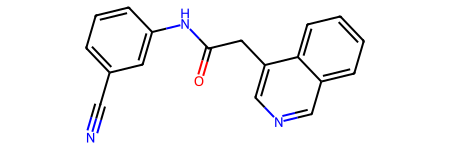

In [12]:
data_mol['mol'][0]

In [13]:
def get_fingerprint(mol, bits=1024, fp_radius=2):
    """
    Get the fingerprint from a molecule object
    """
    fpgen = AllChem.GetMorganGenerator(radius=fp_radius, fpSize=bits)
    #fp = AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024)
    return np.array(fpgen.GetFingerprint(mol))

def fingerprint_from_df(df, mol_column='mol'):
    """
    Get the fingerprint from a pandas dataframe column.
    """
    df['fp'] = df[mol_column].copy().apply(get_fingerprint)
    return df

In [14]:
# Testing the fingerprint function
fp_test = get_fingerprint(data_mol['mol'][0])
len(fp_test)

1024

In [15]:
# Apply the fingerprint function to the dataframe
data_fp = fingerprint_from_df(data_mol)
data_fp.head(1)

,index,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol,fp
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,26.719515,14.641091,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x0000023516B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Expanding the fingerprint

##### Format other data

In [16]:
# Convert True/False to 1/0 for covalent_warhead
data_fp['covalent_warhead_1h'] = np.array(data_fp['covalent_warhead']).astype(int)
#data_fp.head(1)

##### Add new features

In [17]:
desc_names = ['HeavyAtomCount', 'TPSA', 'NumHAcceptors',
              'NumHDonors', 'NumHeteroatoms', 'PEOE_VSA10',
              'VSA_EState3', 'NOCount', 'MolLogP', 'NHOHCount']

def add_descriptor(mol, descriptor):
    """
    Add a descriptor to a molecule object.
    """
    return Descriptors.CalcMolDescriptors(mol)[descriptor]

def add_descriptor_to_df(df, descriptor, mol_column='mol'):
    """
    Add a descriptor to a dataframe row by row.
    """
    df[descriptor] = df[mol_column].copy().apply(add_descriptor, args=(descriptor,))
    return df


### Trying to optimize the operation for multiple descriptors
def add_descriptors(mol, descriptors):
    """
    Add a descriptor to a molecule object.
    """
    vals = Descriptors.CalcMolDescriptors(mol)
    
    #mol.SetProp(descriptor, str(function(mol)))
    return [vals[descriptor] for descriptor in descriptors]

def add_descriptors_to_df(df, descriptors, mol_column='mol'):
    """
    Add grouped descriptors to a dataframe row by row.
    """
    df['descriptors'] = df[mol_column].copy().apply(add_descriptor, args=(descriptors,))
    return df



#add_descriptor(data_fp['mol'][0], 'NumHAcceptors')

df = add_descriptor_to_df(data_fp, 'NumHDonors')
df = add_descriptor_to_df(df, 'NumHAcceptors')
df = add_descriptor_to_df(df, 'NumHeteroatoms')
df = add_descriptor_to_df(df, 'HeavyAtomCount')
df = add_descriptor_to_df(df, 'NumRotatableBonds') ### NOTE
df = add_descriptor_to_df(df, 'RingCount')

df.head(1)

,index,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol,fp,covalent_warhead_1h,NumHDonors,NumHAcceptors,NumHeteroatoms,HeavyAtomCount,NumRotatableBonds,RingCount
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,26.719515,14.641091,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x0000023516B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,3,4,22,3,3


In [18]:
add_descriptor(data_fp['mol'][30], 'VSA_EState3')

5.1519242797400056

##### Adding continuous features

In [19]:
cont_descriptors = ['PEOE_VSA10', 'TPSA', 'VSA_EState3', 'MolLogP', 'MolWt']

for desc in cont_descriptors:
    df = add_descriptor_to_df(df, desc)

df.head(1)

,index,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol,fp,covalent_warhead_1h,NumHDonors,NumHAcceptors,NumHeteroatoms,HeavyAtomCount,NumRotatableBonds,RingCount,PEOE_VSA10,TPSA,VSA_EState3,MolLogP,MolWt
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,26.719515,14.641091,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x0000023516B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,3,4,22,3,3,0.0,65.78,13.730298,3.28768,287.322


##### Processing continuous features

In [20]:
# Robustly bin continuous data
# MW, LogP, TPSA

def bin_continuous_data(df_e, descriptor, quantiles=7):
    """
    Bin continuous data into a bins, depending on the distribution of the data.
    """
    df2 = df_e.copy()
    df2[f'{descriptor}_q'] = df2[descriptor].astype(float)
    df2[f'{descriptor}_q'] = pd.qcut(df2[f'{descriptor}_q'], precision=0, q=quantiles, duplicates='drop')

    # Change the value to the outer bin label
    df2[f'{descriptor}_q'] = df2[f'{descriptor}_q'].apply(lambda x: int(x.right))


    return df2


for desc in cont_descriptors:
    df = bin_continuous_data(df, desc)


df.head(1)

,index,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol,fp,covalent_warhead_1h,NumHDonors,NumHAcceptors,NumHeteroatoms,HeavyAtomCount,NumRotatableBonds,RingCount,PEOE_VSA10,TPSA,VSA_EState3,MolLogP,MolWt,PEOE_VSA10_q,TPSA_q,VSA_EState3_q,MolLogP_q,MolWt_q
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,26.719515,14.641091,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x0000023516B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,3,4,22,3,3,0.0,65.78,13.730298,3.28768,287.322,5,66,37,3,319


In [21]:
# Get counts of all values of a descriptor
#df_test.NumHDonors.value_counts().sort_values(ascending=False).head(20)

# Get counts of all values of a descriptor
def onehot_encode_multi_cat(df_e, column, lbl_tag, max_cats=20):
    """
    Onehot encode a column with multiple categories.
    """
    top = [x for x in df_e[column].value_counts().sort_values(ascending=False).head(max_cats).index]
    print(top)
    df2 = df_e.copy()
    for label in top:
        df2[f'{label}_{lbl_tag}'] = np.where(df2[column]==label, 1, 0)

    try:
        be_cols = [f'{top[x]}_{lbl_tag}' for x in range(len(top))] # list of new column names
        print(be_cols)
    except:
        be_cols = []

    return df2, be_cols


df_encoded, nhdr = onehot_encode_multi_cat(df, 'NumHDonors', 'nhdr') # usage example
df_encoded, nha = onehot_encode_multi_cat(df_encoded, 'NumHAcceptors', 'nha')
df_encoded, nhe = onehot_encode_multi_cat(df_encoded, 'NumHeteroatoms', 'nhe')
df_encoded = bin_continuous_data(df_encoded, 'HeavyAtomCount')
df_encoded, hac_q = onehot_encode_multi_cat(df_encoded, 'HeavyAtomCount_q', 'hac_q')
df_encoded = bin_continuous_data(df_encoded, 'NumRotatableBonds')
df_encoded, nrb_q = onehot_encode_multi_cat(df_encoded, 'NumRotatableBonds_q', 'nrb_q')
df_encoded, rc = onehot_encode_multi_cat(df_encoded, 'RingCount', 'rc')
df_encoded[['NumHDonors']+nhdr+['NumHAcceptors']+nha+['NumHeteroatoms']+nhe+['HeavyAtomCount']+hac_q+['NumRotatableBonds']+nrb_q+['RingCount']+rc].head(1)

[1, 2, 0, 3, 4, 5]
['1_nhdr', '2_nhdr', '0_nhdr', '3_nhdr', '4_nhdr', '5_nhdr']
[3, 4, 5, 2, 6, 7, 8, 9, 1, 10]
['3_nha', '4_nha', '5_nha', '2_nha', '6_nha', '7_nha', '8_nha', '9_nha', '1_nha', '10_nha']
[6, 5, 7, 8, 4, 9, 10, 11, 12, 3, 2]
['6_nhe', '5_nhe', '7_nhe', '8_nhe', '4_nhe', '9_nhe', '10_nhe', '11_nhe', '12_nhe', '3_nhe', '2_nhe']
[20, 26, 30, 22, 24, 39, 27]
['20_hac_q', '26_hac_q', '30_hac_q', '22_hac_q', '24_hac_q', '39_hac_q', '27_hac_q']
[3, 2, 4, 11, 6, 5]
['3_nrb_q', '2_nrb_q', '4_nrb_q', '11_nrb_q', '6_nrb_q', '5_nrb_q']
[3, 4, 2, 5, 1, 6]
['3_rc', '4_rc', '2_rc', '5_rc', '1_rc', '6_rc']


,NumHDonors,1_nhdr,2_nhdr,0_nhdr,3_nhdr,4_nhdr,5_nhdr,NumHAcceptors,3_nha,4_nha,5_nha,2_nha,6_nha,7_nha,8_nha,9_nha,1_nha,10_nha,NumHeteroatoms,6_nhe,5_nhe,7_nhe,8_nhe,4_nhe,9_nhe,10_nhe,11_nhe,12_nhe,3_nhe,2_nhe,HeavyAtomCount,20_hac_q,26_hac_q,30_hac_q,22_hac_q,24_hac_q,39_hac_q,27_hac_q,NumRotatableBonds,3_nrb_q,2_nrb_q,4_nrb_q,11_nrb_q,6_nrb_q,5_nrb_q,RingCount,3_rc,4_rc,2_rc,5_rc,1_rc,6_rc
0,1,1,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,22,0,0,0,1,0,0,0,3,1,0,0,0,0,0,3,1,0,0,0,0,0


In [22]:
cont_descriptors = ['PEOE_VSA10', 'TPSA', 'VSA_EState3', 'MolLogP', 'MolWt']

df_encoded, peoe = onehot_encode_multi_cat(df_encoded, 'PEOE_VSA10_q', 'peoe')
df_encoded, tpsa = onehot_encode_multi_cat(df_encoded, 'TPSA_q', 'tpsa')
df_encoded, vesa = onehot_encode_multi_cat(df_encoded, 'VSA_EState3_q', 'vesa')
df_encoded, logp = onehot_encode_multi_cat(df_encoded, 'MolLogP_q', 'logp')
df_encoded, mw = onehot_encode_multi_cat(df_encoded, 'MolWt_q', 'mw')

df_encoded[['PEOE_VSA10_q']+peoe+['TPSA_q']+tpsa+['VSA_EState3_q']+vesa+['MolLogP_q']+logp+['MolWt_q']+mw].head(1)

[5, 12, 30, 6]
['5_peoe', '12_peoe', '30_peoe', '6_peoe']
[60, 46, 171, 54, 86, 66, 75]
['60_tpsa', '46_tpsa', '171_tpsa', '54_tpsa', '86_tpsa', '66_tpsa', '75_tpsa']
[2, 5, 37, 3, 8, 11, 6]
['2_vesa', '5_vesa', '37_vesa', '3_vesa', '8_vesa', '11_vesa', '6_vesa']
[4, 2, 3, 6]
['4_logp', '2_logp', '3_logp', '6_logp']
[287, 424, 319, 342, 362, 388, 678]
['287_mw', '424_mw', '319_mw', '342_mw', '362_mw', '388_mw', '678_mw']


,PEOE_VSA10_q,5_peoe,12_peoe,30_peoe,6_peoe,TPSA_q,60_tpsa,46_tpsa,171_tpsa,54_tpsa,86_tpsa,66_tpsa,75_tpsa,VSA_EState3_q,2_vesa,5_vesa,37_vesa,3_vesa,8_vesa,11_vesa,6_vesa,MolLogP_q,4_logp,2_logp,3_logp,6_logp,MolWt_q,287_mw,424_mw,319_mw,342_mw,362_mw,388_mw,678_mw
0,5,1,0,0,0,66,0,0,0,0,0,1,0,37,0,0,1,0,0,0,0,3,0,0,1,0,319,0,0,1,0,0,0,0


In [23]:
df_encoded.head(1)

,index,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol,fp,covalent_warhead_1h,NumHDonors,NumHAcceptors,NumHeteroatoms,HeavyAtomCount,NumRotatableBonds,RingCount,PEOE_VSA10,TPSA,VSA_EState3,MolLogP,MolWt,PEOE_VSA10_q,TPSA_q,VSA_EState3_q,MolLogP_q,MolWt_q,1_nhdr,2_nhdr,0_nhdr,3_nhdr,4_nhdr,5_nhdr,3_nha,4_nha,5_nha,2_nha,6_nha,7_nha,8_nha,9_nha,1_nha,10_nha,6_nhe,5_nhe,7_nhe,8_nhe,4_nhe,...,HeavyAtomCount_q,20_hac_q,26_hac_q,30_hac_q,22_hac_q,24_hac_q,39_hac_q,27_hac_q,NumRotatableBonds_q,3_nrb_q,2_nrb_q,4_nrb_q,11_nrb_q,6_nrb_q,5_nrb_q,3_rc,4_rc,2_rc,5_rc,1_rc,6_rc,5_peoe,12_peoe,30_peoe,6_peoe,60_tpsa,46_tpsa,171_tpsa,54_tpsa,86_tpsa,66_tpsa,75_tpsa,2_vesa,5_vesa,37_vesa,3_vesa,8_vesa,11_vesa,6_vesa,4_logp,2_logp,3_logp,6_logp,287_mw,424_mw,319_mw,342_mw,362_mw,388_mw,678_mw
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,26.719515,14.641091,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x0000023516B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,3,4,22,3,3,0.0,65.78,13.730298,3.28768,287.322,5,66,37,3,319,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,22,0,0,0,1,0,0,0,3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


##### Merge fingerprint data

In [24]:
# Extend the fingerprint with descriptors
fp_val_cols =  ['covalent_warhead_1h'] + nhdr + nha + hac_q + nrb_q + rc+ peoe + tpsa + vesa + logp + mw   # define columns to merge # nhe + 
df_encoded['fp_c'] = df_encoded.apply(lambda row: np.append(row['fp'], [row[col] for col in fp_val_cols]), axis=1)
df_encoded.head(1)

,index,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol,fp,covalent_warhead_1h,NumHDonors,NumHAcceptors,NumHeteroatoms,HeavyAtomCount,NumRotatableBonds,RingCount,PEOE_VSA10,TPSA,VSA_EState3,MolLogP,MolWt,PEOE_VSA10_q,TPSA_q,VSA_EState3_q,MolLogP_q,MolWt_q,1_nhdr,2_nhdr,0_nhdr,3_nhdr,4_nhdr,5_nhdr,3_nha,4_nha,5_nha,2_nha,6_nha,7_nha,8_nha,9_nha,1_nha,10_nha,6_nhe,5_nhe,7_nhe,8_nhe,4_nhe,...,20_hac_q,26_hac_q,30_hac_q,22_hac_q,24_hac_q,39_hac_q,27_hac_q,NumRotatableBonds_q,3_nrb_q,2_nrb_q,4_nrb_q,11_nrb_q,6_nrb_q,5_nrb_q,3_rc,4_rc,2_rc,5_rc,1_rc,6_rc,5_peoe,12_peoe,30_peoe,6_peoe,60_tpsa,46_tpsa,171_tpsa,54_tpsa,86_tpsa,66_tpsa,75_tpsa,2_vesa,5_vesa,37_vesa,3_vesa,8_vesa,11_vesa,6_vesa,4_logp,2_logp,3_logp,6_logp,287_mw,424_mw,319_mw,342_mw,362_mw,388_mw,678_mw,fp_c
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,26.719515,14.641091,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x0000023516B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,3,4,22,3,3,0.0,65.78,13.730298,3.28768,287.322,5,66,37,3,319,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [25]:
df_encoded['fp_c'][0].shape

(1089,)

#### Dealing with inconsistent IC50 values

In [26]:
data_nm = df_encoded.copy()#[df_encoded.f_avg_IC50 <= 99.99] # no max IC50 values
data_nm.shape

(877, 107)

#### Splitting Data

In [27]:
# Create a dataframe with the fingerprints
fp=data_nm['fp_c'].values.tolist()
#ic50=data_nm['f_avg_IC50'].values
ic50=data_nm['r_avg_IC50'].values
ic50=np.log10(ic50)
ic50[:100]

array([ 1.16557343,  1.65395953,  0.91390378,  1.14286371,  1.65981415,
        1.11286272,  1.50813988,  1.64194039,  1.6562125 ,  1.69310419,
        1.99563519,  0.51856087,  0.17997943,  0.51964207,  0.93184527,
        1.06095381,  1.99563519,  1.99563519, -0.28843337, -0.18345635,
        1.27532783,  1.0574621 ,  0.15867005, -0.37696729,  0.09185804,
        1.28945263,  1.99563519,  1.32125145, -0.27932997,  1.99563519,
        1.1975027 ,  1.99563519,  1.59348995,  0.21484226,  0.06534603,
        0.20971148,  0.21484226,  0.22737244, -0.1914088 ,  1.13299658,
        0.65261246,  1.58432242,  1.70171924,  1.24284968, -0.32287909,
        0.21484226,  0.74442645,  1.30390336,  1.49470667, -0.41359642,
        1.4730142 ,  1.17181481,  1.26666571,  0.21041722, -0.07897384,
        0.96769538,  1.99563519,  1.99563519,  1.99563519,  1.99563519,
        1.99563519, -0.01377917,  0.53927626,  0.57410692,  1.01714701,
        1.99563519,  1.430515  ,  1.50556527,  1.18178977,  0.31

In [28]:
ic50.max()

1.9991378097563366

In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(fp, ic50, test_size=0.3, random_state=42)

#### Training an MLPregressor

In [82]:
regr = MLPRegressor(random_state=1, max_iter=600,
                    hidden_layer_sizes=(400, 350, 300),
                    alpha=1e-4, solver='lbfgs', learning_rate='adaptive')
regr.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(400, 350, 300), learning_rate='adaptive',
             max_iter=600, random_state=1, solver='lbfgs')

In [83]:
test = regr.predict(X_test)
#test
r2_score(y_test, test)

0.6586795656526979

In [84]:
regr.score(X_test, y_test)

0.6586795656526979

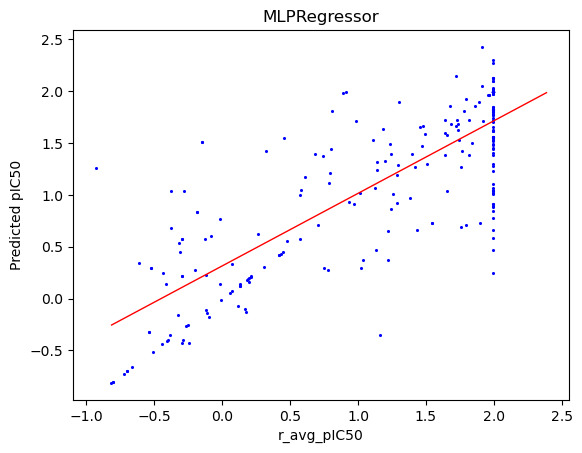

In [85]:
plt.scatter(y_test, test, color='b', s=1.5)
# Add axes labels
plt.xlabel('r_avg_pIC50')
plt.ylabel('Predicted pIC50')
plt.title('MLPRegressor')
m, c = np.polyfit(y_test, test, 1)
y = np.arange(min(test), np.max(test), 0.1)
plt.plot(y, m*y+c, color='r', linewidth=1)

#### Training a RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
regr_f = RandomForestRegressor(n_estimators= 400, max_depth=20, random_state=1)
regr_f.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=400, random_state=1)

In [95]:
test_f = regr_f.predict(X_test)
#test
r2_score(y_test, test_f)

0.709606358118386

In [96]:
regr_f.score(X_test, y_test)

0.709606358118386

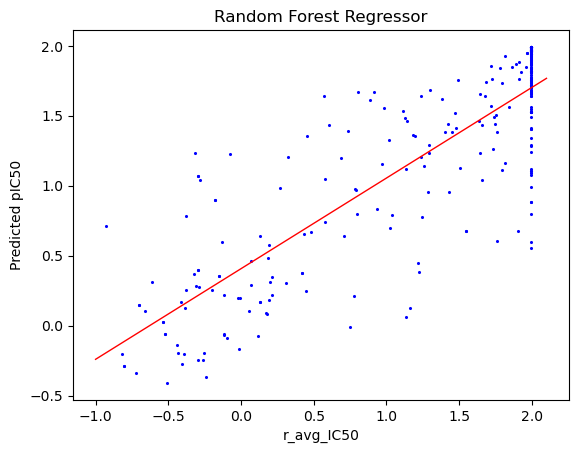

In [97]:
plt.scatter(y_test, test_f, color='b', s=1.5)
plt.xlabel('r_avg_IC50')
plt.ylabel('Predicted pIC50')
plt.title('Random Forest Regressor')
m, c = np.polyfit(y_test, test_f, 1)
y = np.arange(-1, 2.2, 0.1)
plt.plot(y, m*y+c, color='r', linewidth=1)